#ARTIFICIAL NEURAL NETWORKS

##Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data
##Overview
In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

%matplotlib inline
warnings.filterwarnings('ignore')

##Dataset: "Alphabets_data.csv"
The dataset provided, "Alphabets_data.csv", consists of labelled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.


##Tasks
###1. Data Exploration and Preprocessing
* Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
* Execute necessary data preprocessing steps including data normalization, managing missing values.


In [2]:
alphabets = pd.read_csv('/content/Alphabets_data.csv')
alphabets

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

###EDA

In [3]:
alphabets.info()
# There are total 20000 entries with 17 columns
# only 'letter' column is of the 'object' dtype
# All the other 16 columns are of the 'int64' dtype
# No numm values presents in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
alphabets.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [5]:
alphabets.duplicated().sum()
# Duplicate values are present

1332

In [6]:
alphabets.drop_duplicates(inplace=True)
alphabets.duplicated().sum()
# All the duplicate values have been removed

0

In [7]:
alphabets.isna().sum()
# No missing values present

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

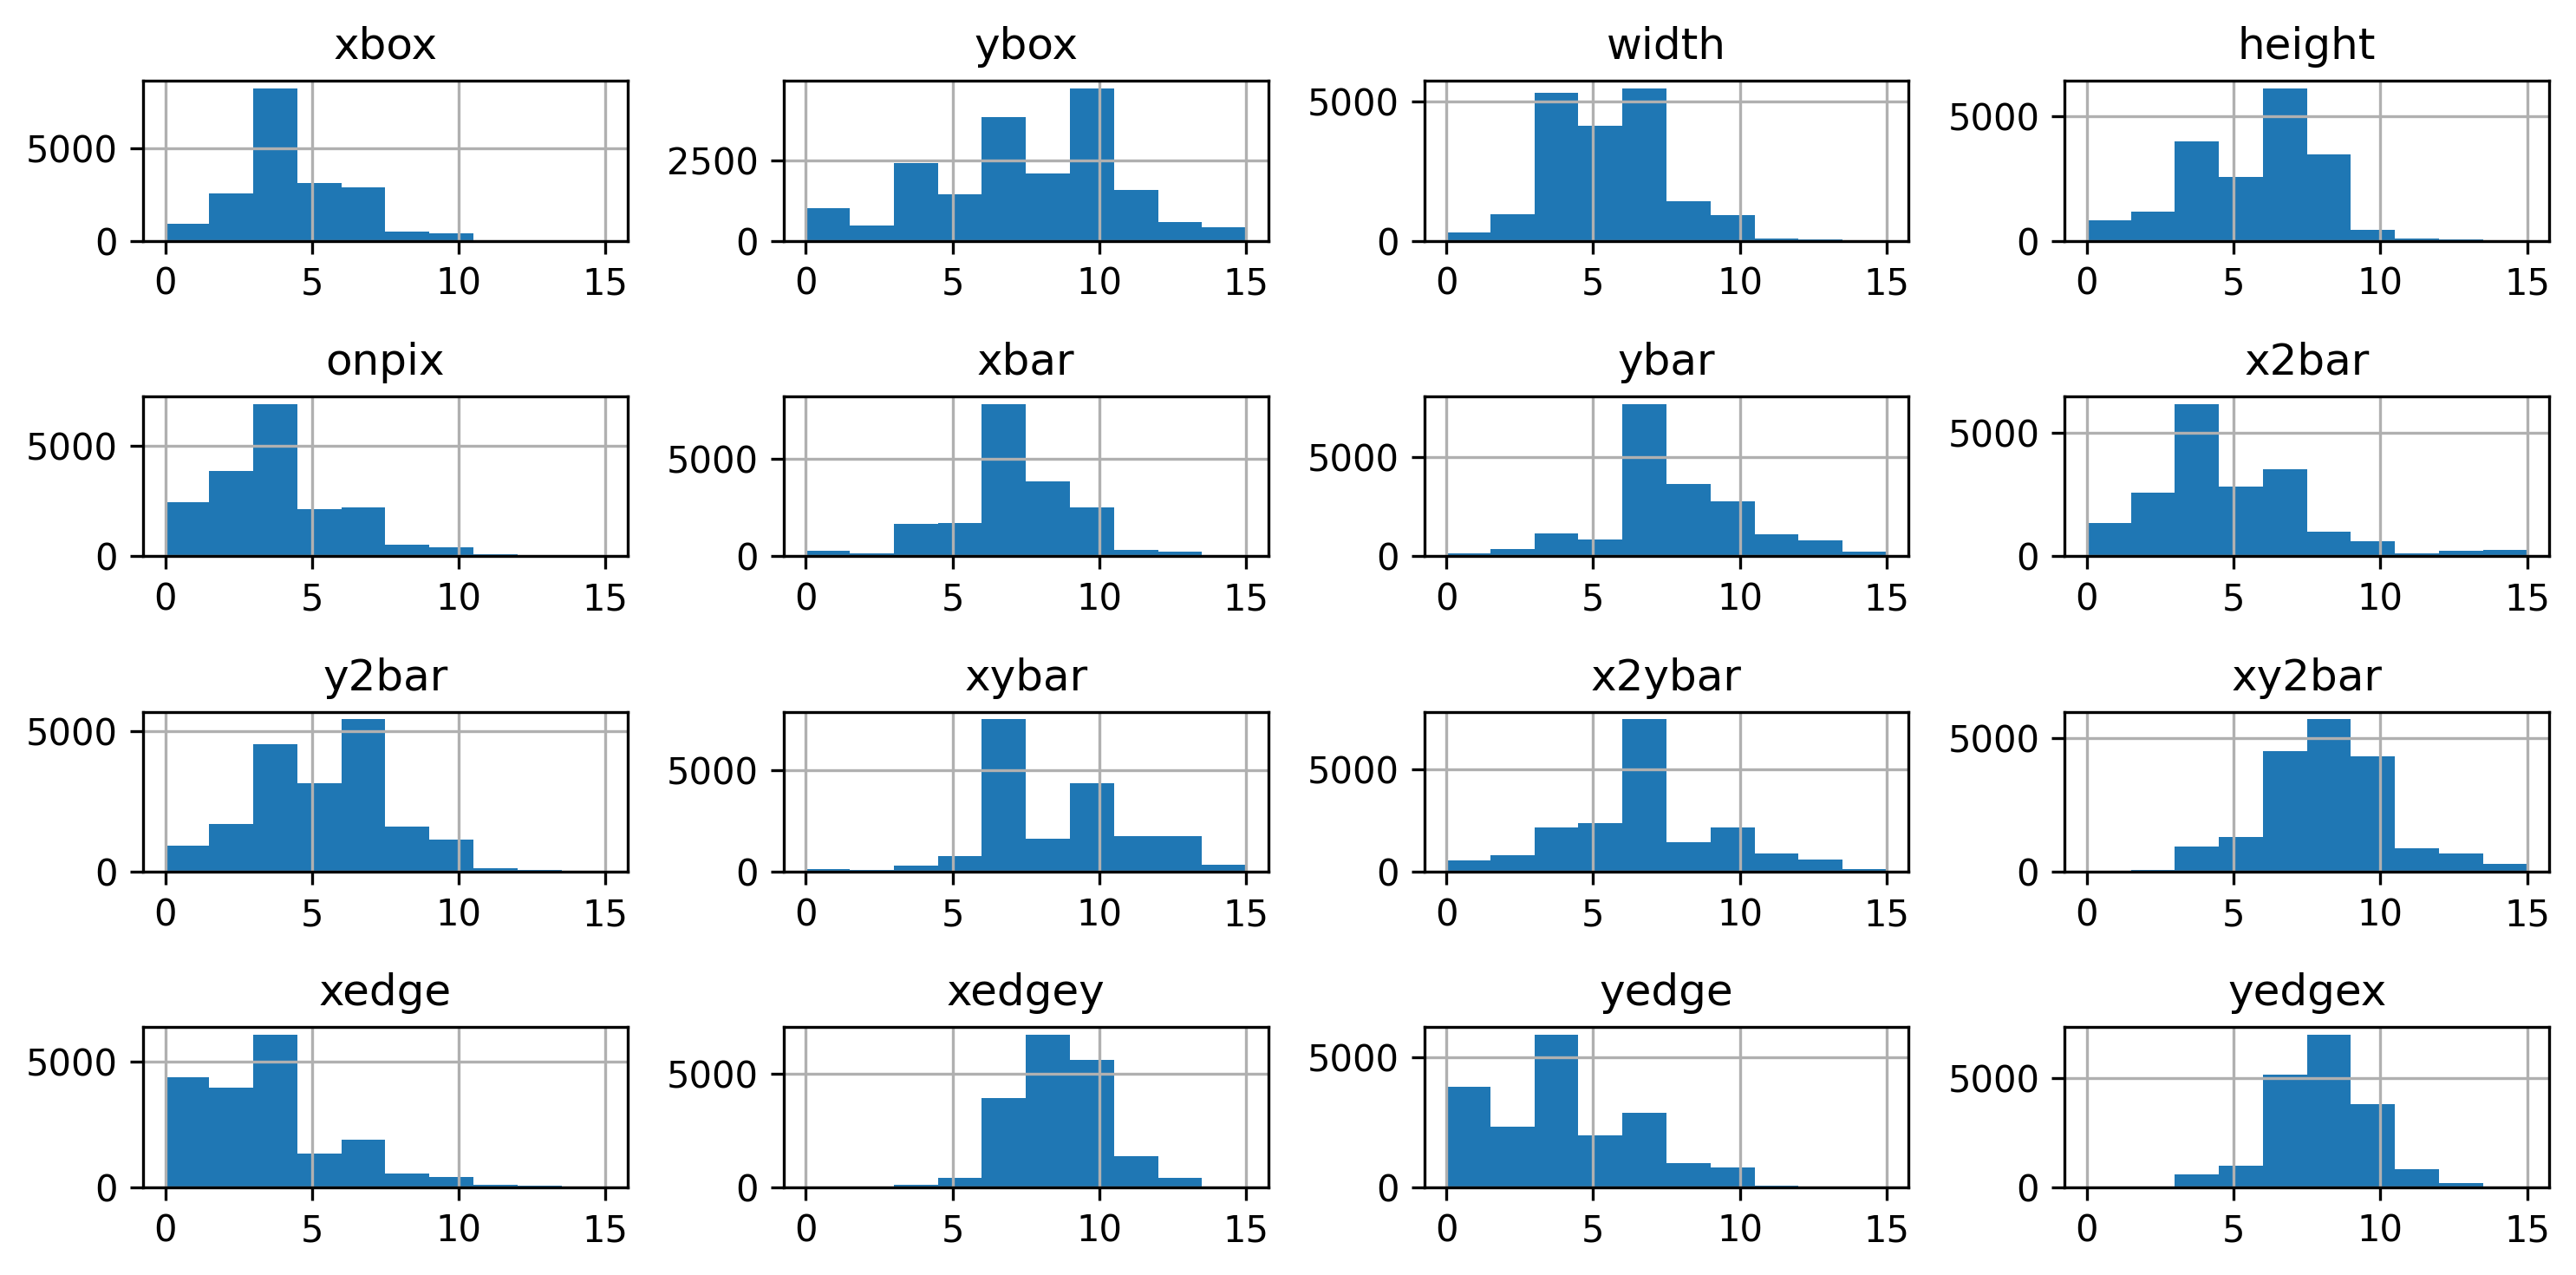

In [8]:
alphabets.hist()
plt.tight_layout()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'xbox'),
  Text(2, 0, 'ybox'),
  Text(3, 0, 'width'),
  Text(4, 0, 'height'),
  Text(5, 0, 'onpix'),
  Text(6, 0, 'xbar'),
  Text(7, 0, 'ybar'),
  Text(8, 0, 'x2bar'),
  Text(9, 0, 'y2bar'),
  Text(10, 0, 'xybar'),
  Text(11, 0, 'x2ybar'),
  Text(12, 0, 'xy2bar'),
  Text(13, 0, 'xedge'),
  Text(14, 0, 'xedgey'),
  Text(15, 0, 'yedge'),
  Text(16, 0, 'yedgex')])

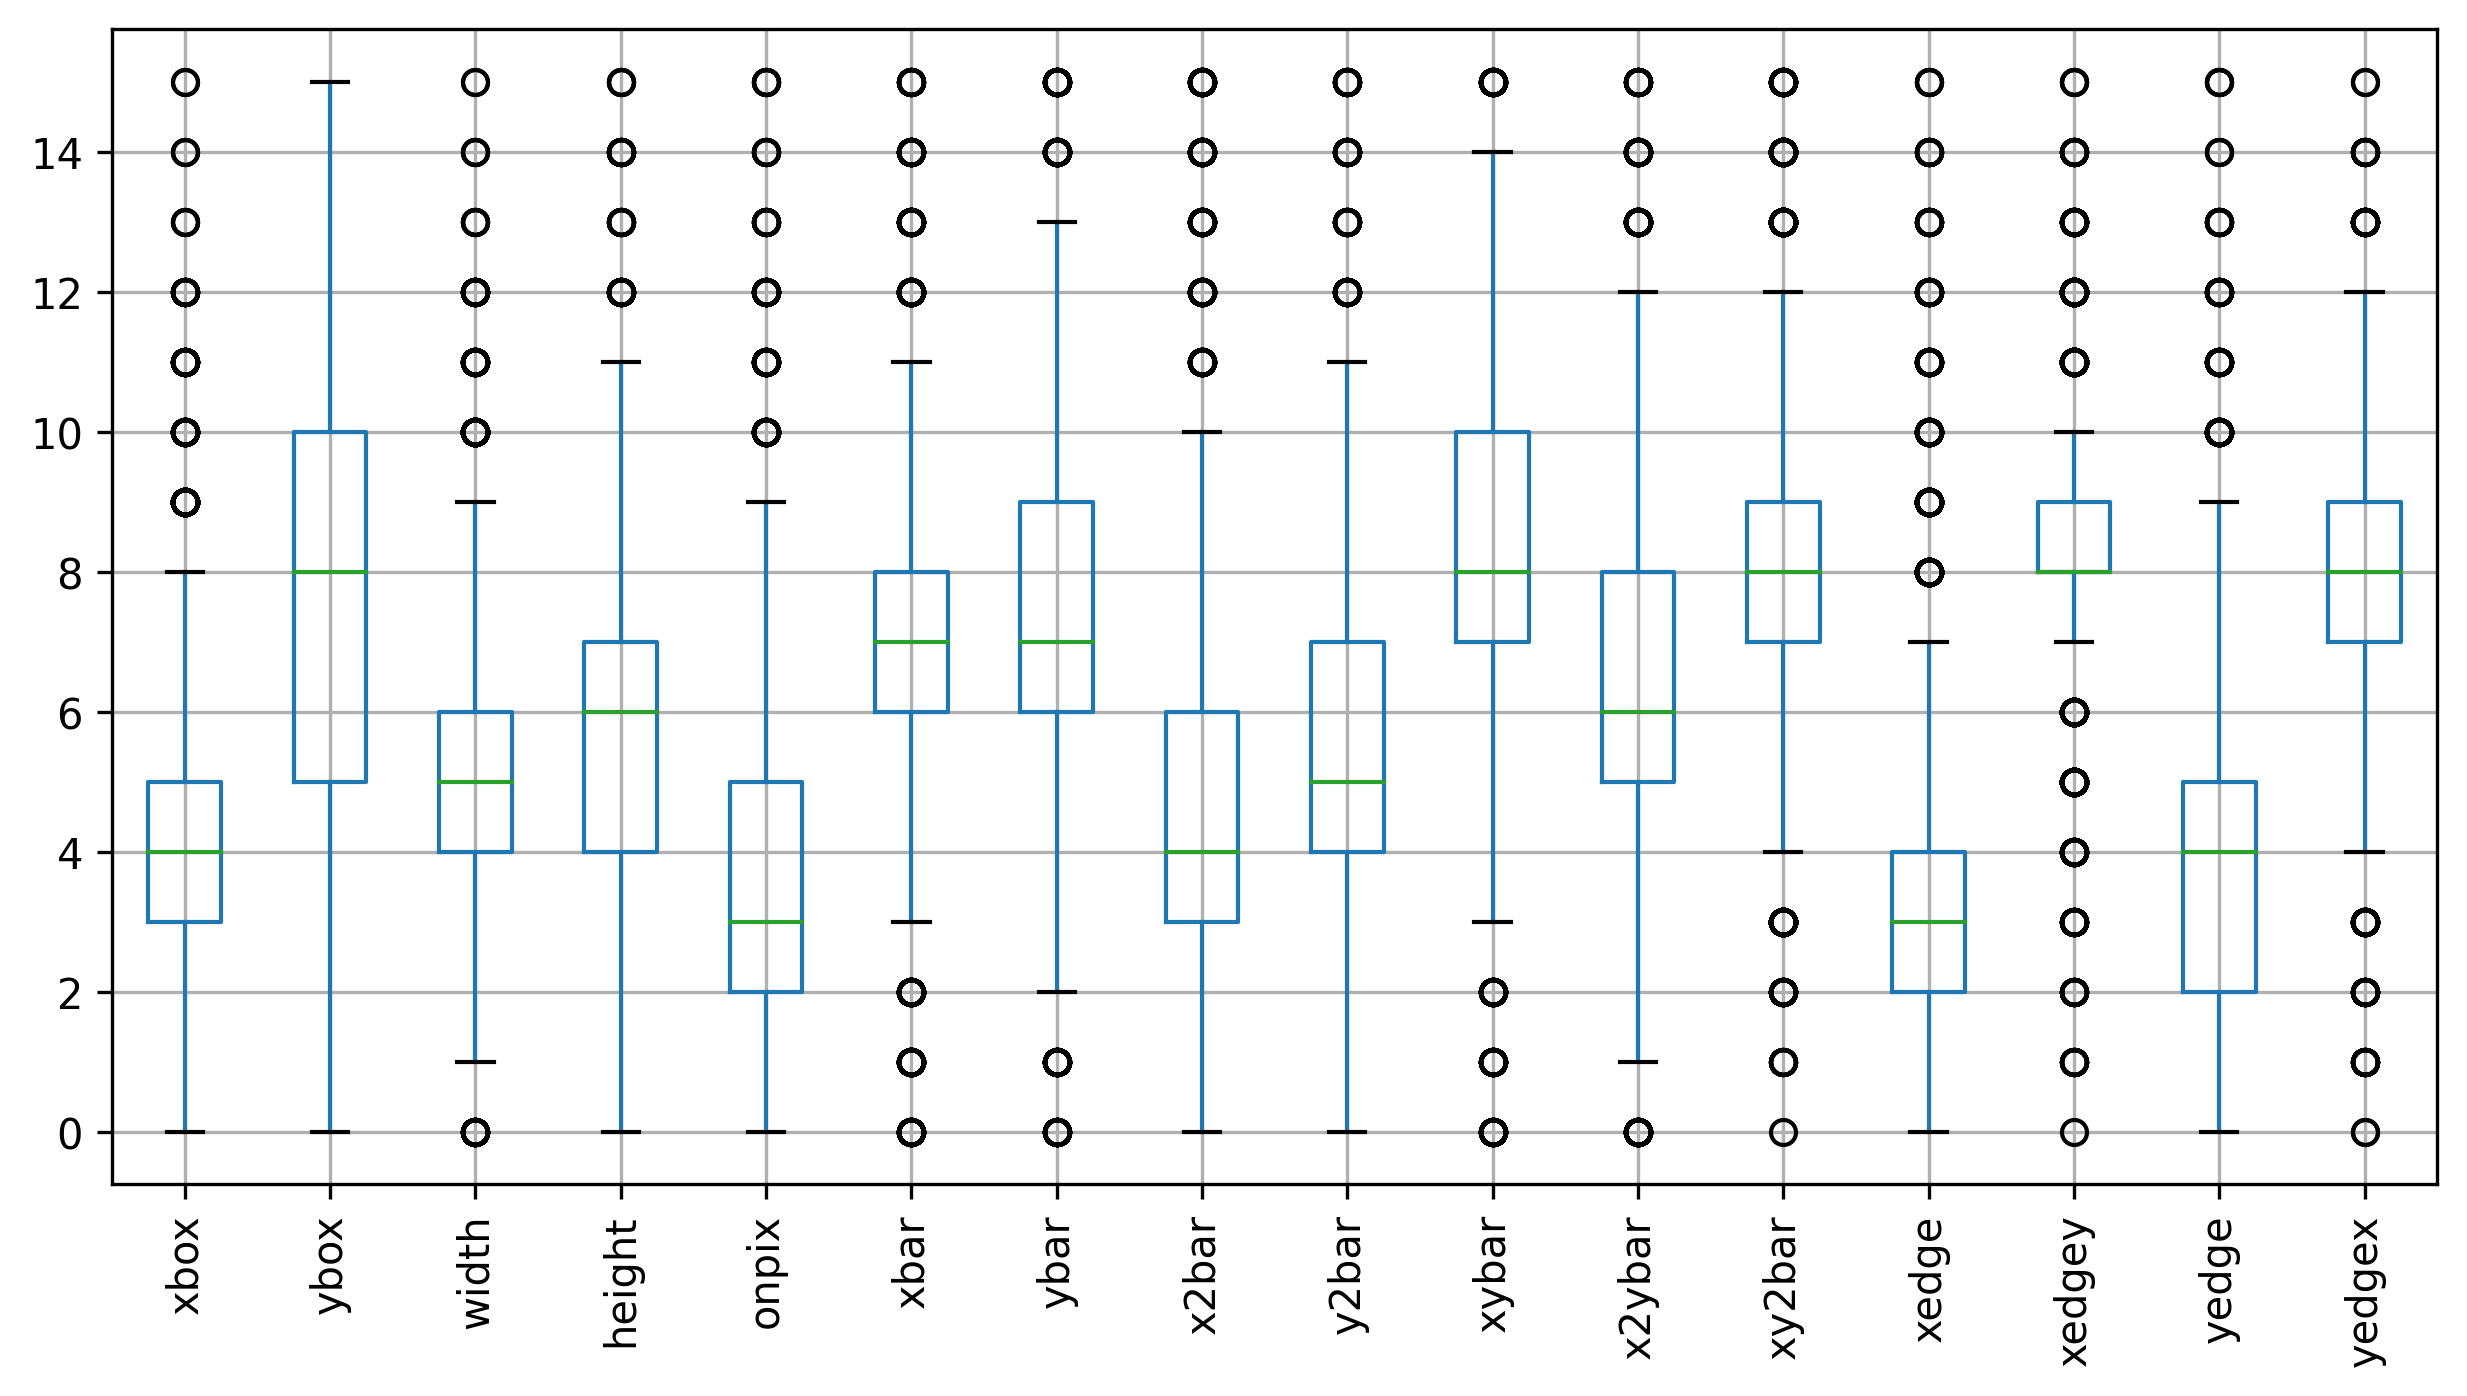

In [9]:
alphabets.boxplot()
plt.xticks(rotation=90)
# Outliers are present

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'xbox'),
  Text(1, 0, 'ybox'),
  Text(2, 0, 'width'),
  Text(3, 0, 'height'),
  Text(4, 0, 'onpix'),
  Text(5, 0, 'xbar'),
  Text(6, 0, 'ybar'),
  Text(7, 0, 'x2bar'),
  Text(8, 0, 'y2bar'),
  Text(9, 0, 'xybar'),
  Text(10, 0, 'x2ybar'),
  Text(11, 0, 'xy2bar'),
  Text(12, 0, 'xedge'),
  Text(13, 0, 'xedgey'),
  Text(14, 0, 'yedge'),
  Text(15, 0, 'yedgex')])

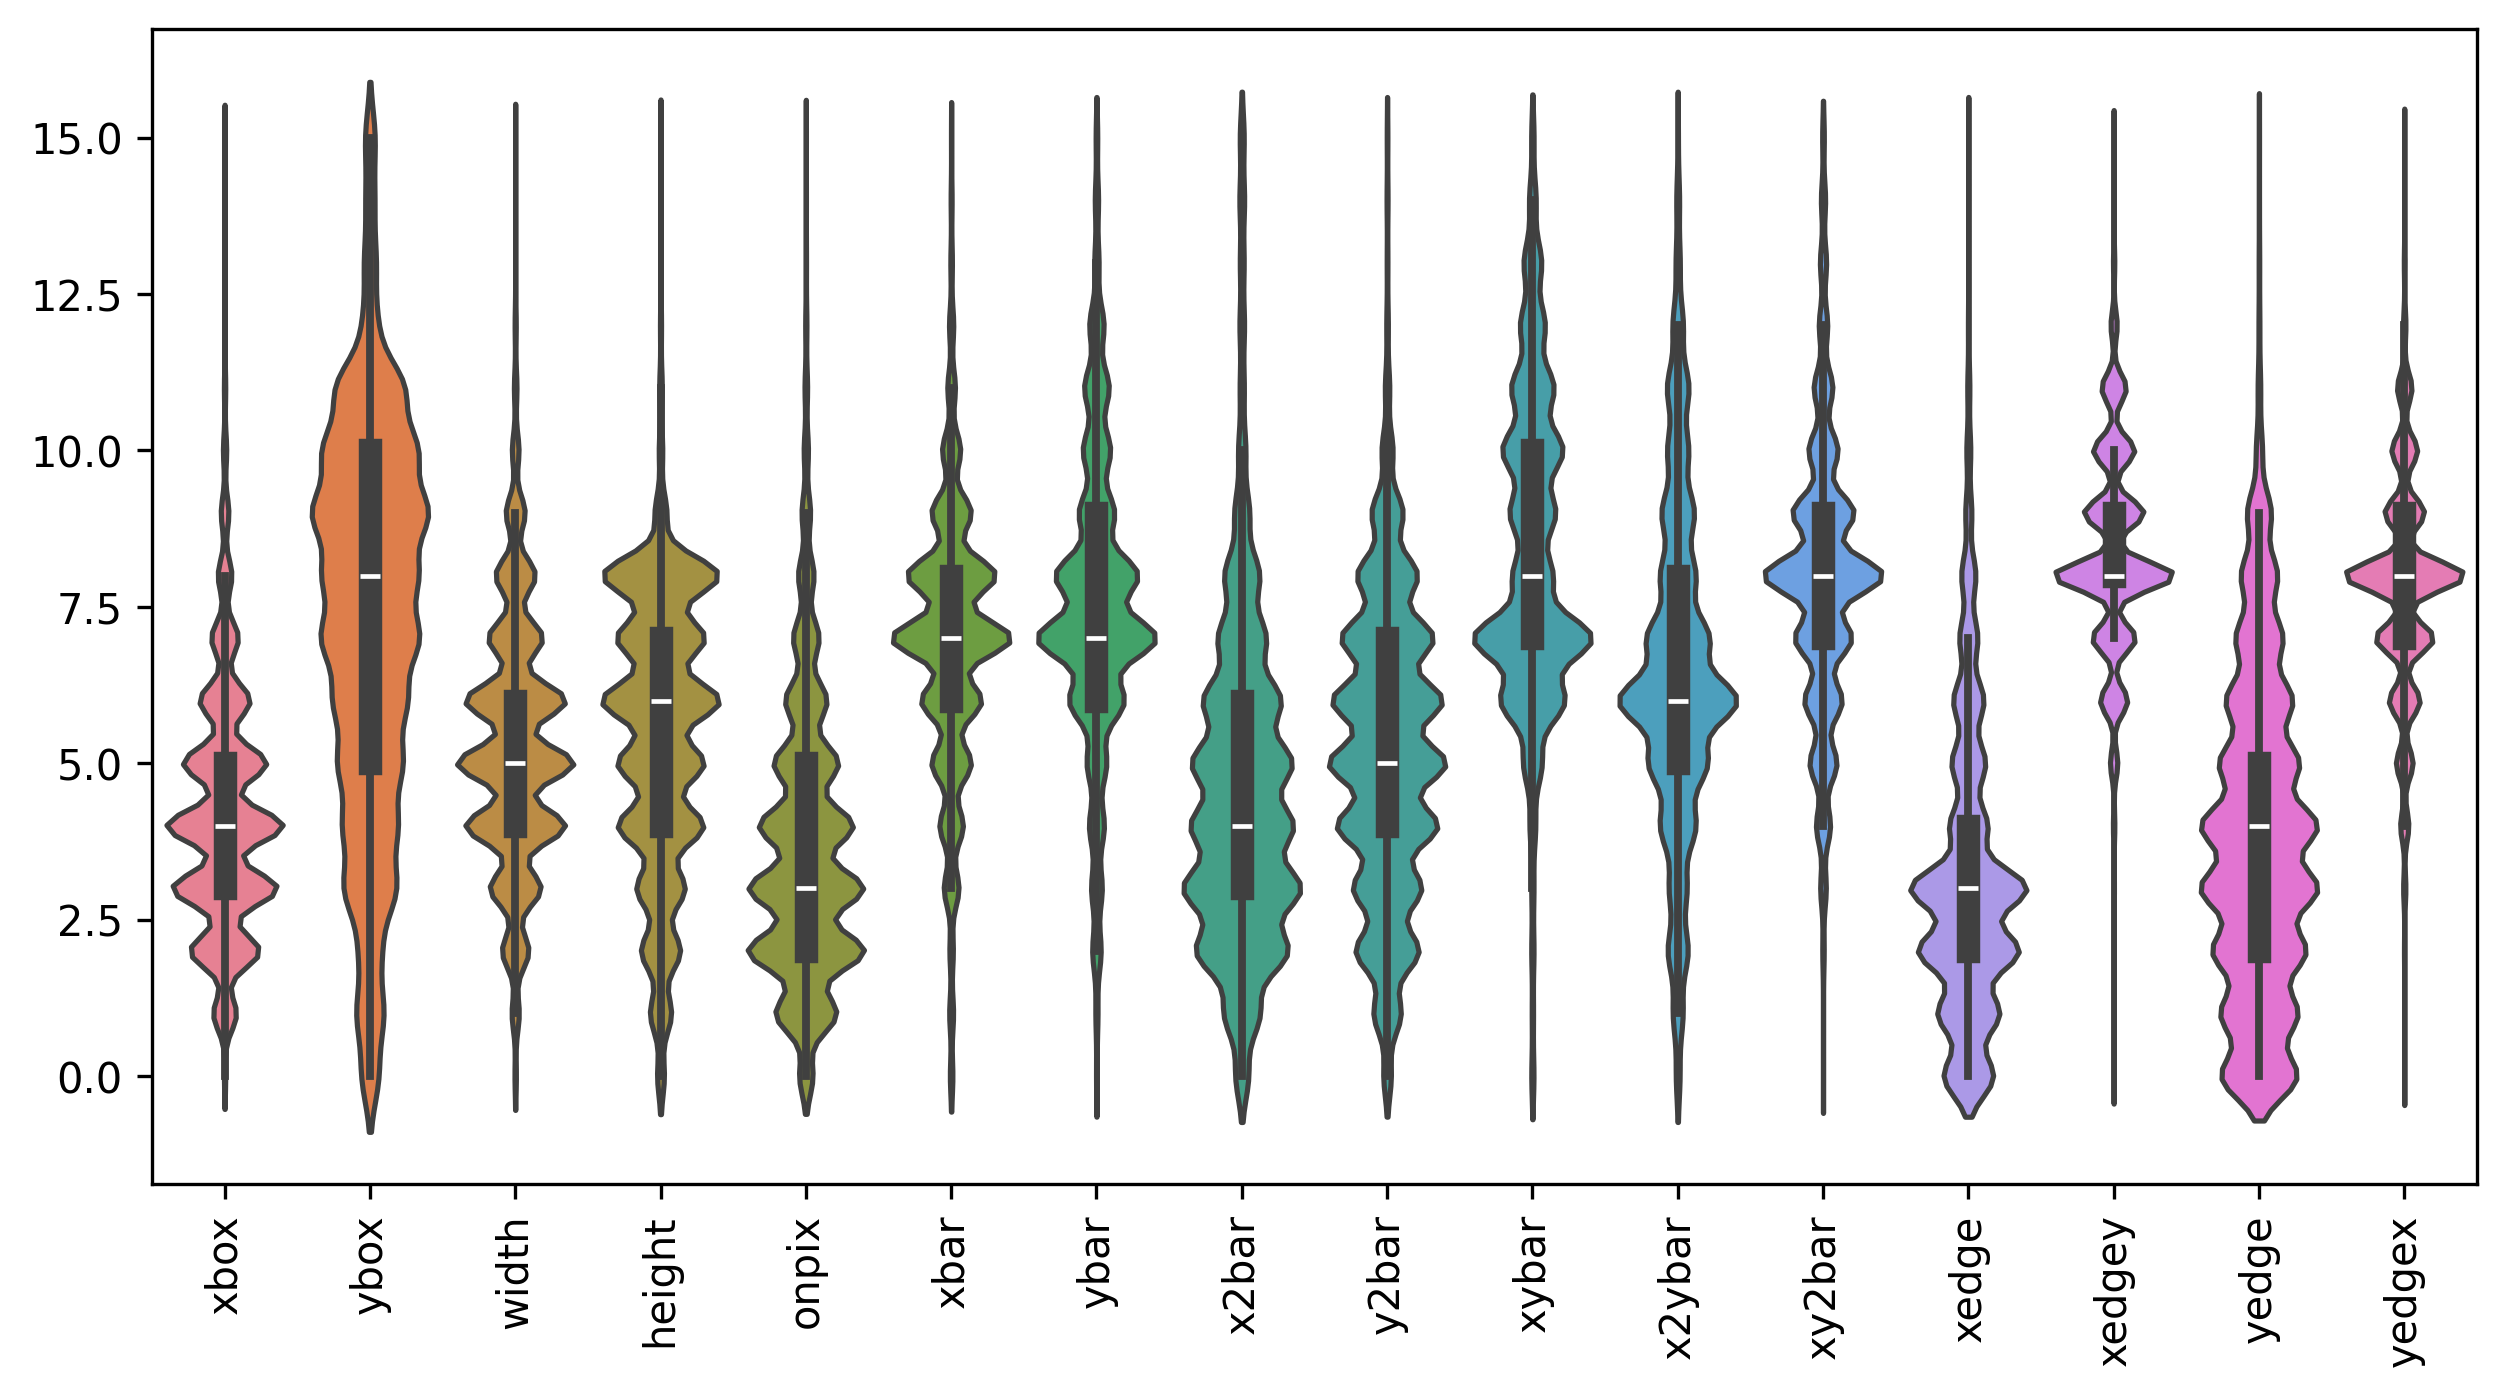

In [10]:
sns.violinplot(alphabets)
plt.xticks(rotation=90)

In [75]:
sns.pairplot(alphabets)

In [11]:
alphabets.corr(numeric_only=True)

xbox      ybox     width    height     onpix      xbar      ybar  \
xbox    1.000000  0.753845  0.838201  0.656202  0.586514 -0.039371  0.035260   
ybox    0.753845  1.000000  0.660359  0.804746  0.529108  0.044918 -0.055264   
width   0.838201  0.660359  1.000000  0.647059  0.747093  0.057657  0.007720   
height  0.656202  0.804746  0.647059  1.000000  0.631189  0.043576 -0.028748   
onpix   0.586514  0.529108  0.747093  0.631189  1.000000  0.138054 -0.046437   
xbar   -0.039371  0.044918  0.057657  0.043576  0.138054  1.000000 -0.394904   
ybar    0.035260 -0.055264  0.007720 -0.028748 -0.046437 -0.394904  1.000000   
x2bar   0.010554 -0.017451 -0.108948  0.094866 -0.006882 -0.053963 -0.111068   
y2bar   0.035618  0.077625  0.036848  0.030820 -0.095682 -0.127433 -0.049806   
xybar   0.135848  0.150073  0.088383 -0.005738 -0.111016  0.056401  0.155055   
x2ybar  0.033564 -0.058348  0.004005 -0.009940 -0.079454 -0.379856  0.596464   
xy2bar -0.045004 -0.004483 -0.044465  0.030940 -0.037892 -0.043720 -0.284431   
xedge   0.473408  0.262301  0.548471  0.250480  0.627043  0.139327 -0.049289   
xedgey  0.094814 -0.007424  0.037140  0.023574  0.011670 -0.259587  0.561759   
yedge   0.246954  0.214834  0.225726  0.289518  0.483866  0.126966 -0.096509   
yedgex -0.097928 -0.031288 -0.111611 -0.006940 -0.053799  0.258355 -0.211369   

           x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
xbox    0.010554  0.035618  0.135848  0.033564 -0.045004  0.473408  0.094814   
ybox   -0.017451  0.077625  0.150073 -0.058348 -0.004483  0.262301 -0.007424   
width  -0.108948  0.036848  0.088383  0.004005 -0.044465  0.548471  0.037140   
height  0.094866  0.030820 -0.005738 -0.009940  0.030940  0.250480  0.023574   
onpix  -0.006882 -0.095682 -0.111016 -0.079454 -0.037892  0.627043  0.011670   
xbar   -0.053963 -0.127433  0.056401 -0.379856 -0.043720  0.139327 -0.259587   
ybar   -0.111068 -0.049806  0.155055  0.596464 -0.284431 -0.049289  0.561759   
x2bar   1.000000 -0.163920 -0.309157  0.041791  0.087403  0.113528 -0.078674   
y2bar  -0.163920  1.000000  0.123406 -0.049807  0.118624 -0.386254 -0.058009   
xybar  -0.309157  0.123406  1.000000  0.042297 -0.119797 -0.197548  0.024034   
x2ybar  0.041791 -0.049807  0.042297  1.000000  0.063280  0.041938  0.528679   
xy2bar  0.087403  0.118624 -0.119797  0.063280  1.000000 -0.005787 -0.185416   
xedge   0.113528 -0.386254 -0.197548  0.041938 -0.005787  1.000000  0.004063   
xedgey -0.078674 -0.058009  0.024034  0.528679 -0.185416  0.004063  1.000000   
yedge   0.033467  0.240212 -0.124774 -0.233572  0.046392  0.107003 -0.070433   
yedgex  0.185946 -0.061613 -0.108670 -0.242875  0.243253 -0.045856 -0.185969   

           yedge    yedgex  
xbox    0.246954 -0.097928  
ybox    0.214834 -0.031288  
width   0.225726 -0.111611  
height  0.289518 -0.006940  
onpix   0.483866 -0.053799  
xbar    0.126966  0.258355  
ybar   -0.096509 -0.211369  
x2bar   0.033467  0.185946  
y2bar   0.240212 -0.061613  
xybar  -0.124774 -0.108670  
x2ybar -0.233572 -0.242875  
xy2bar  0.046392  0.243253  
xedge   0.107003 -0.045856  
xedgey -0.070433 -0.185969  
yedge   1.000000  0.150748  
yedgex  0.150748  1.000000

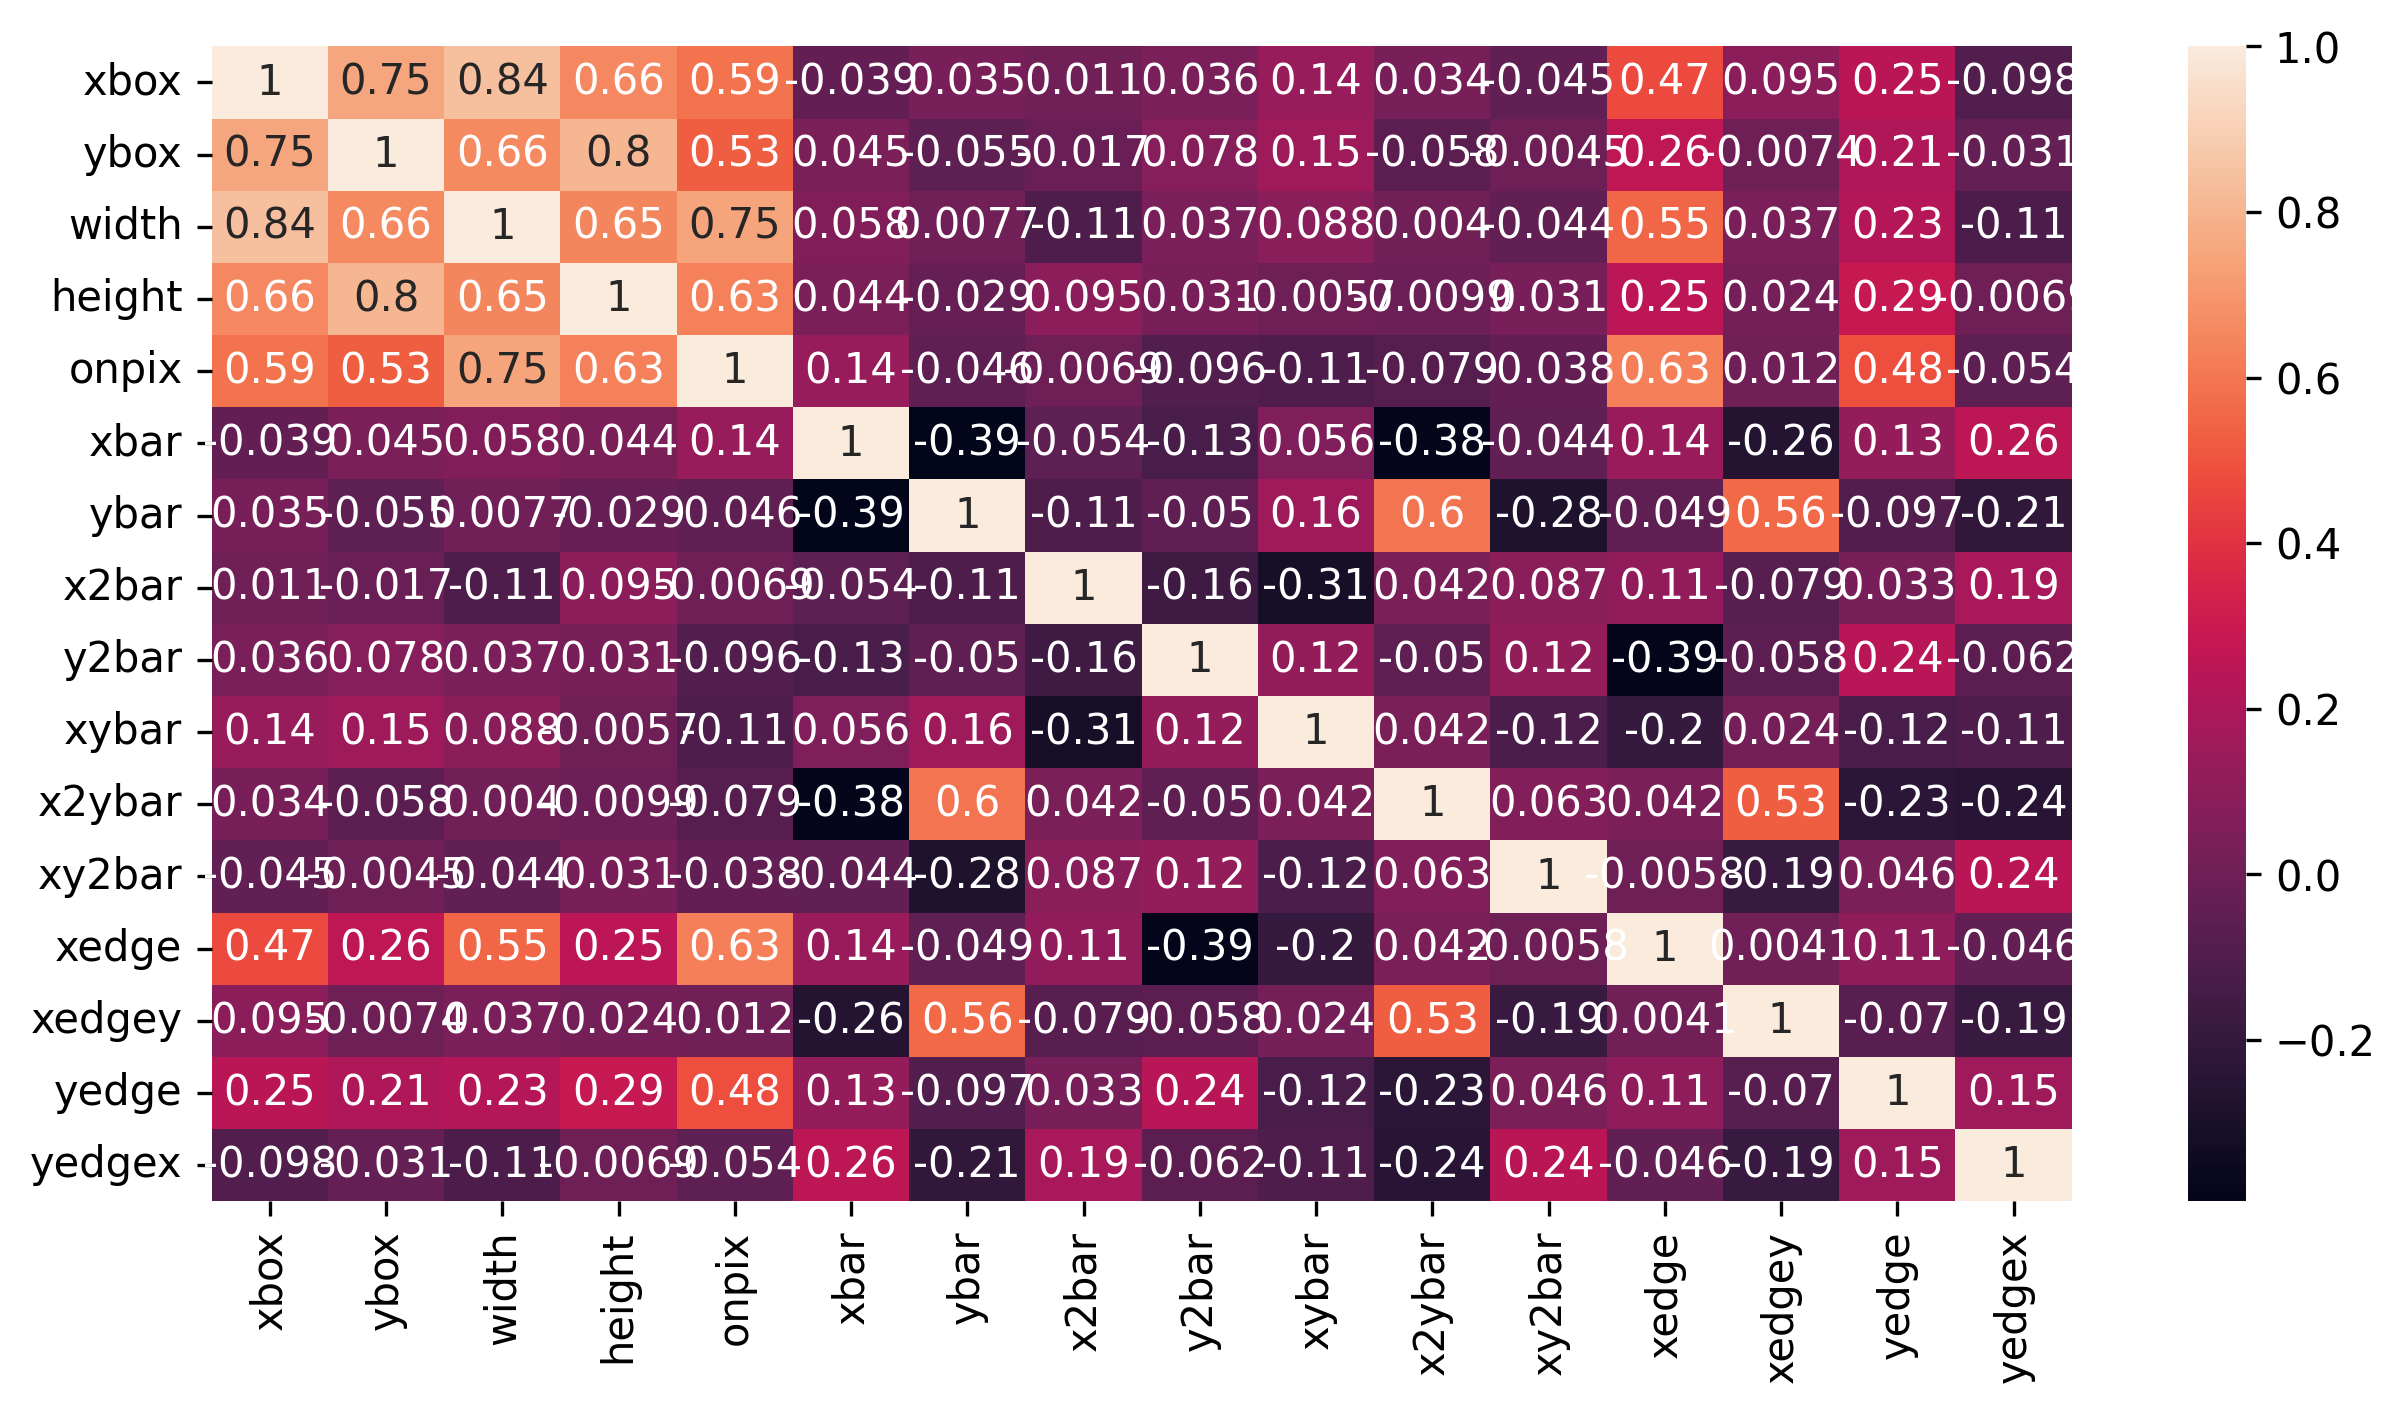

In [12]:
sns.heatmap(alphabets.corr(numeric_only=True), annot=True)
plt.show()
# 'xbox','ybox','width','height','onpix' are moderatly or highly  and positively correlated to each other
# There are other features as well which are positvely correlated with each other

In [13]:
# Lets divide the data into two parts
# X -> Set of independent attributes
# Y -> Set  of target or dependent attribute
X = alphabets.iloc[:,1:]
Y = alphabets.iloc[:,0]

In [14]:
X

xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0         2     8      3       5      1     8    13      0      6      6   
1         5    12      3       7      2    10     5      5      4     13   
2         4    11      6       8      6    10     6      2      6     10   
3         7    11      6       6      3     5     9      4      6      4   
4         2     1      3       1      1     8     6      6      6      6   
...     ...   ...    ...     ...    ...   ...   ...    ...    ...    ...   
19994     5     8      7       7      7     7     9      4      8      7   
19995     2     2      3       3      2     7     7      7      6      6   
19996     7    10      8       8      4     4     8      6      9     12   
19997     6     9      6       7      5     6    11      3      7     11   
19999     4     9      6       6      2     9     5      3      1      8   

       x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          10       8      0       8      0       8  
1           3       9      2       8      4      10  
2           3       7      3       7      3       9  
3           4      10      6      10      2       8  
4           5       9      1       7      5      10  
...       ...     ...    ...     ...    ...     ...  
19994       7       8      3      10      8       6  
19995       6       4      2       8      3       7  
19996       9      13      2       9      3       7  
19997       9       5      2      12      2       4  
19999       1       8      2       7      2       8  

[18668 rows x 16 columns]

In [15]:
Y

0        T
1        I
2        D
3        N
4        G
        ..
19994    T
19995    D
19996    C
19997    T
19999    A
Name: letter, Length: 18668, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y_label = LE.fit_transform(Y)
Y = pd.DataFrame(Y_label, columns=['letter'])
Y

letter
0          19
1           8
2           3
3          13
4           6
...       ...
18663      19
18664       3
18665       2
18666      19
18667       0

[18668 rows x 1 columns]

In [17]:
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(Y)
y_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [18]:
import string
LetterValues = []
for i in string.ascii_uppercase:
    LetterValues.append(i)
print(LetterValues)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [19]:
Y_label = pd.DataFrame(y_categorical, columns=LetterValues)
Y_label

A    B    C    D    E    F    G    H    I    J  ...    Q    R    S  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
18663  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18664  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18665  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18666  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18667  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         T    U    V    W    X    Y    Z  
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
18663  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
18664  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
18665  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
18666  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
18667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[18668 rows x 26 columns]

In [20]:
# Normalization of the X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

xbox      ybox     width    height     onpix      xbar      ybar  \
0     -1.144417  0.237070 -1.178294 -0.232716 -1.231474  0.531756  2.358246   
1      0.451855  1.491943 -1.178294  0.685459 -0.768617  1.515924 -1.090370   
2     -0.080235  1.178224  0.372167  1.144546  1.082808  1.515924 -0.659293   
3      1.516037  1.178224  0.372167  0.226371 -0.305761 -0.944497  0.633938   
4     -1.144417 -1.958957 -1.178294 -2.069066 -1.231474  0.531756 -0.659293   
...         ...       ...       ...       ...       ...       ...       ...   
18663  0.451855  0.237070  0.888987  0.685459  1.545665  0.039671  0.633938   
18664 -1.144417 -1.645239 -1.178294 -1.150891 -0.768617  0.039671 -0.228216   
18665  1.516037  0.864506  1.405808  1.144546  0.157095 -1.436582  0.202861   
18666  0.983946  0.550788  0.372167  0.685459  0.619952 -0.452413  1.496092   
18667 -0.080235  0.550788  0.372167  0.226371 -0.768617  1.023840 -1.090370   

          x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
0     -1.746100  0.344235 -0.953149  1.351557  0.035798 -1.347535 -0.223412   
1      0.158195 -0.517819  1.882192 -1.315513  0.510429 -0.486890 -0.223412   
2     -0.984382  0.344235  0.667046 -1.315513 -0.438833 -0.056568 -0.858409   
3     -0.222664  0.344235 -1.763246 -0.934503  0.985060  1.234399  1.046582   
4      0.539054  0.344235 -0.953149 -0.553493  0.510429 -0.917213 -0.858409   
...         ...       ...       ...       ...       ...       ...       ...   
18663 -0.222664  1.206289 -0.548100  0.208527  0.035798 -0.056568  1.046582   
18664  0.919913  0.344235 -0.953149 -0.172483 -1.862725 -0.486890 -0.223412   
18665  0.539054  1.637317  1.477143  0.970547  2.408953 -0.486890  0.411585   
18666 -0.603523  0.775262  1.072095  0.970547 -1.388094 -0.486890  2.316576   
18667 -0.603523 -1.810900 -0.143052 -2.077534  0.035798 -0.486890 -0.858409   

          yedge    yedgex  
0     -1.494712  0.130096  
1      0.079965  1.336868  
2     -0.313704  0.733482  
3     -0.707373  0.130096  
4      0.473635  1.336868  
...         ...       ...  
18663  1.654643 -1.076676  
18664 -0.313704 -0.473290  
18665 -0.313704 -0.473290  
18666 -0.707373 -2.283449  
18667 -0.707373  0.130096  

[18668 rows x 16 columns]

##2. Model Implementation
* Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
* Divide the dataset into training and test sets.
* Train your model on the training set and then use it to make predictions on the test set.


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_label, test_size=0.20, random_state=42)

In [23]:
X_train

xbox      ybox     width    height     onpix      xbar      ybar  \
1650  -0.080235 -0.390366 -0.144653 -0.691804 -0.305761 -0.452413 -0.228216   
4660   2.580219  1.805661  2.439449  0.685459  0.619952  0.039671 -0.228216   
10117 -0.080235  0.864506 -0.144653  0.685459 -0.768617  0.039671 -0.228216   
4794  -1.676508 -1.958957 -1.695114 -1.609979 -1.231474 -1.436582 -0.228216   
5642  -0.080235  0.864506 -0.144653  1.603634 -0.305761  0.531756 -0.228216   
...         ...       ...       ...       ...       ...       ...       ...   
11284 -0.080235  0.237070 -1.178294  2.521809 -0.305761  0.531756  0.202861   
11964 -0.080235 -0.076648 -0.144653 -0.232716 -0.305761  0.039671 -0.659293   
5390   0.451855  0.550788  0.888987  0.685459  2.008521  0.531756  0.202861   
860   -0.080235  1.178224  0.372167  1.144546 -0.305761  1.515924  1.065015   
15795 -0.612326 -0.704085 -0.661474  0.685459  1.545665  0.531756 -1.090370   

          x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
1650   0.539054  0.344235  0.261997  0.589537  0.510429 -0.486890 -0.223412   
4660  -0.984382  1.637317  1.072095 -0.553493  0.035798  0.373754 -0.858409   
10117  1.681631  0.775262 -0.548100  0.208527  0.035798 -0.056568 -0.223412   
4794   0.158195  1.206289 -0.548100 -0.172483  2.408953 -1.347535 -0.223412   
5642   1.300772  0.344235 -0.953149  0.208527  0.035798 -0.056568 -0.223412   
...         ...       ...       ...       ...       ...       ...       ...   
11284 -0.603523 -0.948846  1.477143 -0.553493 -1.388094 -0.056568 -0.223412   
11964  0.919913  0.775262  1.072095 -0.172483  1.459691 -0.486890  1.046582   
5390   0.539054 -0.948846 -0.953149  0.589537  0.035798  1.234399 -0.858409   
860   -1.365241 -0.948846 -0.953149  2.113577  0.035798 -0.917213  1.681579   
15795 -0.222664 -1.379873 -0.548100  0.208527  0.510429  0.804077  1.046582   

          yedge    yedgex  
1650   0.079965  0.733482  
4660   0.079965 -0.473290  
10117  0.079965  0.130096  
4794   1.260973  0.733482  
5642   0.867304  0.733482  
...         ...       ...  
11284  0.867304  1.336868  
11964  0.079965  0.733482  
5390   0.079965 -0.473290  
860   -1.494712  0.130096  
15795  0.079965 -0.473290  

[14934 rows x 16 columns]

In [24]:
Y_train

A    B    C    D    E    F    G    H    I    J  ...    Q    R    S  \
1650   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4660   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
10117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4794   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5642   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11284  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
11964  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5390   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
860    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15795  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         T    U    V    W    X    Y    Z  
1650   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4660   0.0  0.0  0.0  0.0  1.0  0.0  0.0  
10117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4794   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5642   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
11284  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11964  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5390   0.0  0.0  0.0  1.0  0.0  0.0  0.0  
860    0.0  0.0  0.0  0.0  0.0  1.0  0.0  
15795  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[14934 rows x 26 columns]

In [25]:
X_test

xbox      ybox     width    height     onpix      xbar      ybar  \
9668  -0.612326 -1.017803 -0.144653 -1.150891 -0.305761  0.039671  1.496092   
17065  2.580219  2.119379  1.405808  1.144546  0.619952  0.039671 -1.090370   
4309  -0.612326 -1.017803 -0.661474 -1.150891 -0.768617 -0.944497  1.927169   
5380  -0.080235  0.864506  0.888987  1.144546  2.008521  1.515924 -0.659293   
12396 -1.144417 -1.331521 -1.178294 -1.609979 -0.768617  1.023840 -0.659293   
...         ...       ...       ...       ...       ...       ...       ...   
6045  -1.144417 -1.331521 -1.178294 -2.069066 -1.231474 -1.436582  1.927169   
7897  -0.080235  0.550788 -0.144653  0.685459  0.157095  0.039671 -0.228216   
9367   0.451855  0.550788  1.405808  1.144546  2.934234  0.039671 -0.228216   
15362  0.451855  0.550788  0.372167  0.226371  0.157095 -1.436582 -1.090370   
5140   0.451855  0.550788  1.405808  0.226371  0.619952  1.515924 -0.659293   

          x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
9668  -0.984382 -1.379873 -0.953149  0.970547  0.035798  1.234399  1.681579   
17065 -0.222664  1.637317  0.667046 -0.934503  0.510429 -0.056568 -0.858409   
4309  -0.603523  0.344235  1.072095  0.970547 -1.862725 -0.917213  1.681579   
5380  -0.984382 -0.517819 -0.143052 -0.934503 -1.862725 -0.056568 -0.223412   
12396 -0.603523 -0.086792  0.667046 -0.934503 -0.438833 -0.486890 -0.223412   
...         ...       ...       ...       ...       ...       ...       ...   
6045  -0.603523 -0.086792  1.477143  1.351557 -1.388094 -0.917213  1.681579   
7897   1.300772 -0.086792 -0.548100 -0.172483  0.035798 -0.056568 -0.223412   
9367   0.158195 -0.517819 -0.548100 -0.172483  0.035798  1.664722  1.046582   
15362 -0.984382  1.206289 -0.953149 -1.696523  0.985060 -1.347535 -0.858409   
5140   0.158195  1.206289  0.667046 -1.315513 -1.388094 -0.056568 -0.223412   

          yedge    yedgex  
9668  -1.494712  0.130096  
17065  2.048312  0.733482  
4309  -1.101042 -1.680063  
5380   0.473635 -0.473290  
12396 -0.707373  0.130096  
...         ...       ...  
6045  -1.101042 -1.680063  
7897  -0.313704  0.130096  
9367   2.048312 -1.680063  
15362 -0.313704 -1.076676  
5140   0.079965  0.733482  

[3734 rows x 16 columns]

In [26]:
Y_test

A    B    C    D    E    F    G    H    I    J  ...    Q    R    S  \
9668   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17065  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
4309   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5380   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
12396  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6045   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7897   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9367   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15362  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5140   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         T    U    V    W    X    Y    Z  
9668   0.0  0.0  0.0  1.0  0.0  0.0  0.0  
17065  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4309   1.0  0.0  0.0  0.0  0.0  0.0  0.0  
5380   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
6045   0.0  0.0  0.0  0.0  0.0  1.0  0.0  
7897   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9367   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15362  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5140   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3734 rows x 26 columns]

In [27]:
# Building the model
ann = Sequential()

# Adding a input layer
ann.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', name='Input'))

# Adding a hidden layer, randomly 130 neurons are added
ann.add(Dense(48, activation='relu', name='Hidden1'))

# Adding a output layer, with 26 classes
ann.add(Dense(Y_label.shape[1], activation='softmax', name='Output'))

In [28]:
# Compiling the model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
ann.fit(X_train, Y_train, batch_size=32, validation_data=(X_test, Y_test), epochs=50)

Epoch 1/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3514 - loss: 2.3789 - val_accuracy: 0.7121 - val_loss: 1.0077
Epoch 2/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7400 - loss: 0.8859 - val_accuracy: 0.7817 - val_loss: 0.7485
Epoch 3/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7925 - loss: 0.6958 - val_accuracy: 0.8074 - val_loss: 0.6264
Epoch 4/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8325 - loss: 0.5561 - val_accuracy: 0.8358 - val_loss: 0.5533
Epoch 5/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.4920 - val_accuracy: 0.8546 - val_loss: 0.4920
Epoch 6/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.4198 - val_accuracy: 0.8653 - val_loss: 0.4449
Epoch 7/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.3846 - val_accuracy: 0.8747 - val_loss: 0.4166
Epoch 8/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.3339 - val_accuracy: 0.

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = ann.evaluate(X_test, Y_test)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_acc)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9428 - loss: 0.1876
Test Loss:  0.18511812388896942
Test Accuracy:  0.9426888227462769


In [31]:
YP = ann.predict(X_test)
YP

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.36767596e-06, 2.36355636e-28, 1.06706711e-20, ...,
        1.65823453e-24, 4.38608351e-16, 0.00000000e+00],
       [4.66005898e-19, 3.84903132e-09, 1.00761775e-16, ...,
        2.07068238e-12, 1.37218336e-25, 9.31148122e-07],
       [6.52573246e-21, 1.39743674e-26, 1.54318075e-24, ...,
        1.23916971e-20, 7.91008733e-06, 6.45366546e-29],
       ...,
       [1.33486864e-07, 3.26109856e-01, 1.47919332e-09, ...,
        1.10585416e-10, 1.99634302e-03, 7.26991173e-16],
       [8.21387283e-13, 2.71463229e-24, 1.75162432e-14, ...,
        1.83456830e-12, 6.36311004e-30, 1.27611037e-22],
       [3.58709940e-15, 2.17843649e-06, 1.08162461e-16, ...,
        6.97620308e-08, 3.16315960e-19, 6.78849013e-18]], dtype=float32)

In [32]:
Y_pred =[]
for i in range(3734):
    Y_pred.append(np.argmax(YP[i]))
Y_Pred_df = pd.DataFrame({'letter': Y_pred})
Y_pred_label = to_categorical(Y_Pred_df)
Y_pred_label_df = pd.DataFrame(Y_pred_label, columns=LetterValues)
Y_pred_label_df

A    B    C    D    E    F    G    H    I    J  ...    Q    R    S  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3731  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3732  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3733  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        T    U    V    W    X    Y    Z  
0     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
3729  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3731  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3732  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3733  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3734 rows x 26 columns]

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_label_df))
# 95 % accurate model

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           1       0.89      0.92      0.90       156
           2       0.89      0.96      0.92       147
           3       0.92      0.95      0.94       163
           4       0.97      0.91      0.94       144
           5       0.93      0.97      0.95       146
           6       0.92      0.88      0.90       173
           7       0.93      0.89      0.91       133
           8       0.94      0.95      0.95       108
           9       0.96      0.92      0.94       150
          10       0.98      0.95      0.96       149
          11       0.97      0.95      0.96       147
          12       0.98      0.96      0.97       143
          13       0.92      0.94      0.93       138
          14       0.90      0.95      0.93       131
          15       0.98      0.93      0.96       161
          16       0.94      0.96      0.95       145
          17       0.91    

##3. Hyperparameter Tuning
* Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
* Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [34]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [35]:
import keras_tuner as kt

####Optimizer tuning

In [36]:
# tuning for optimizer(adam,rmsprop or sgd:stochastic gradient descent) only
def optimizer_selection(hp):
    #create instance of sequential class
    model = Sequential()
   # Adding a input layer
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu',name='input'))

    # Adding a hidden layer, randomly 130 neurons are added
    model.add(Dense(48, activation='relu',name='hidden1'))
    model.add(Dense(30, activation='relu',name='hidden2'))

    # Adding a output layer, with 26 classes
    model.add(Dense(Y_label.shape[1], activation='softmax',name='output'))

    #value of optimizer is categorical so use choice()function else use hp.Int()
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop','adadelta'])
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
# similar to GridSearchCV() we will use here RandomSearch()
tuner = kt.RandomSearch(
    optimizer_selection,# model name-here Sequential() class is our model
    objective='val_accuracy', # increase accuracy of test data i.e. validation test accuracy
    max_trials=3 # for each optimizer take 3 trials, can select 3 to 10
)

In [38]:
# tuner.search() is equivalent to grid.fit()
# epochs should be same as max_trials so 3 is selected
# validation_data: pass test data
tuner.search(X_train,Y_train, epochs = 5, validation_data = (X_test,Y_test))

Trial 3 Complete [00h 00m 09s]
val_accuracy: 0.8460096120834351

Best val_accuracy So Far: 0.8460096120834351
Total elapsed time: 00h 00m 27s


In [39]:
tuner.get_best_hyperparameters()[0].values # as per performance all optimizers are stored in an array
# we want high accuracy optimizer present at index 0 location

{'optimizer': 'rmsprop'}

In [40]:
model_optimized = tuner.get_best_models(num_models=1)[0] # get best model: rmsprop
model_optimized.fit(X_train, Y_train, initial_epoch=6, epochs = 50, validation_data = (X_test, Y_test))

Epoch 7/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8633 - loss: 0.4549 - val_accuracy: 0.8637 - val_loss: 0.4548
Epoch 8/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8799 - loss: 0.3875 - val_accuracy: 0.8685 - val_loss: 0.4347
Epoch 9/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8819 - loss: 0.3670 - val_accuracy: 0.8765 - val_loss: 0.3950
Epoch 10/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8982 - loss: 0.3254 - val_accuracy: 0.8856 - val_loss: 0.3680
Epoch 11/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9042 - loss: 0.3071 - val_accuracy: 0.8948 - val_loss: 0.3347
Epoch 12/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9203 - loss: 0.2645 - val_accuracy: 0.9089 - val_loss: 0.3075
Epoch 13/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9228 - loss: 0.2527 - val_accuracy: 0.9068 - val_loss: 0.3040
Epoch 14/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9264 - loss: 0.2287 - val_accurac

In [41]:
model_optimized.evaluate(X_train, Y_train) # same as score() function
# Accuracy : 99%

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0451


[0.04812813177704811, 0.9839292764663696]

#### Number of neurons tuning

In [52]:
def neuron_tuning(hp):

    #create instance of sequential class
    model = Sequential()

    units = hp.Int('units',min_value = 16, max_value=512)
   # Adding a input layer
    model.add(Dense(units=units, input_shape=(X_train.shape[1],), activation='relu',name='input'))

    # Adding a hidden layer, randomly 130 neurons are added
    model.add(Dense(units=units, activation='relu',name='hidden1'))
    model.add(Dense(units=units, activation='relu',name='hidden2'))

    # Adding a output layer, with 26 classes
    model.add(Dense(Y_label.shape[1], activation='softmax',name='output'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [53]:
neuron_tuner = kt.RandomSearch(neuron_tuning,
                               objective='val_accuracy',
                               max_trials=5,
                               directory='mydir',
                               project_name='ANN neuron Tuning')

In [54]:
neuron_tuner.search(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.948045015335083

Best val_accuracy So Far: 0.948045015335083
Total elapsed time: 00h 01m 49s


In [55]:
neuron_tuner.get_best_hyperparameters()[0].values

{'units': 380}

In [56]:
model_no_neurons = neuron_tuner.get_best_models(num_models=1)[0]
model_no_neurons.fit(X_train, Y_train, batch_size=32, epochs=50, initial_epoch=6)

Epoch 7/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9615 - loss: 0.1120
Epoch 8/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9676 - loss: 0.0906
Epoch 9/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9738 - loss: 0.0742
Epoch 10/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9783 - loss: 0.0658
Epoch 11/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9797 - loss: 0.0591
Epoch 12/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9831 - loss: 0.0500
Epoch 13/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9865 - loss: 0.0428
Epoch 14/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9860 - loss: 0.0416
Epoch 15/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9866 - loss: 0.0379
Epoch 16/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0329
Epoch 17/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9904 - loss: 0.0279
Epoch 18/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6m

####Number of hidden layers

In [58]:
def hidden_layer_tuning(hp):
    #create instance of sequential class
    model = Sequential()

    # Adding a input layer
    model.add(Dense(units=380, input_shape=(X_train.shape[1],), activation='relu',name='input'))

    # Adding a hidden layers, 380 neurons are added
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        model.add(Dense(units=380, activation='relu'))

    # Adding a output layer, with 26 classes
    model.add(Dense(Y_label.shape[1], activation='softmax',name='output'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [59]:
hidden_layer_tuner = kt.RandomSearch(hidden_layer_tuning,
                                     objective='val_accuracy',
                                     max_trials=3,
                                     directory = 'mydir',
                                     project_name = 'num_hidden_layer')

In [60]:
hidden_layer_tuner.search(X_train, Y_train, epochs=5, validation_data = (X_test, Y_test))

Trial 3 Complete [00h 01m 34s]
val_accuracy: 0.9068023562431335

Best val_accuracy So Far: 0.9389394521713257
Total elapsed time: 00h 02m 51s


In [61]:
hidden_layer_tuner.get_best_hyperparameters()[0].values

{'num_layers': 2}

In [62]:
model_max_hidden_layer = hidden_layer_tuner.get_best_models(num_models=1)[0]
model_max_hidden_layer.fit(X_train, Y_train, epochs=50, initial_epoch=6, validation_data=(X_test, Y_test))

Epoch 7/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9615 - loss: 0.1134 - val_accuracy: 0.9472 - val_loss: 0.1667
Epoch 8/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9706 - loss: 0.0848 - val_accuracy: 0.9555 - val_loss: 0.1394
Epoch 9/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9755 - loss: 0.0677 - val_accuracy: 0.9529 - val_loss: 0.1560
Epoch 10/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9773 - loss: 0.0652 - val_accuracy: 0.9411 - val_loss: 0.1796
Epoch 11/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9819 - loss: 0.0533 - val_accuracy: 0.9569 - val_loss: 0.1512
Epoch 12/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9836 - loss: 0.0479 - val_accuracy: 0.9502 - val_loss: 0.1798
Epoch 13/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9574 - val_loss: 0.1568
Epoch 14/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accura

####All together tuning

In [64]:
def hype_tuning(hp):

    model = Sequential()

    counter=0

    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0:
            model.add(
                Dense(hp.Int('units'+ str(i), min_value=16, max_value=512, step=8),
                      activation= hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']),
                      input_shape=(X_train.shape[1],)
                )
            )
        else:
            model.add(
                Dense(hp.Int('units'+ str(i), min_value=16, max_value=512, step=8),
                      activation= hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])
                )
            )
        counter+=1

    #Output Layer
    model.add(Dense(Y_label.shape[1], activation='softmax',name='output'))

    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop','adam','sgd','nadam','adadelta']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )
    return model

In [65]:
fina_tuner = kt.RandomSearch(hype_tuning,
                             objective='val_accuracy',
                             max_trials=3,
                             directory='mydir',
                             project_name='final tuning')

In [66]:
fina_tuner.search(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Trial 3 Complete [00h 00m 16s]
val_accuracy: 0.934118926525116

Best val_accuracy So Far: 0.934118926525116
Total elapsed time: 00h 00m 36s


In [67]:
fina_tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 408,
 'activation0': 'tanh',
 'optimizer': 'rmsprop',
 'units1': 424,
 'activation1': 'relu',
 'units2': 368,
 'activation2': 'relu',
 'units3': 496,
 'activation3': 'relu',
 'units4': 104,
 'activation4': 'tanh',
 'units5': 24,
 'activation5': 'sigmoid',
 'units6': 352,
 'activation6': 'relu',
 'units7': 88,
 'activation7': 'tanh',
 'units8': 224,
 'activation8': 'tanh',
 'units9': 232,
 'activation9': 'sigmoid'}

In [69]:
final_model = fina_tuner.get_best_models(num_models=1)[0]
final_model.fit(X_train, Y_train, epochs=100, initial_epoch=5, validation_data=(X_test, Y_test))

Epoch 6/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9488 - loss: 0.1517 - val_accuracy: 0.9306 - val_loss: 0.2241
Epoch 7/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9578 - loss: 0.1298 - val_accuracy: 0.9459 - val_loss: 0.1622
Epoch 8/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9662 - loss: 0.1038 - val_accuracy: 0.9448 - val_loss: 0.1796
Epoch 9/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9677 - loss: 0.0950 - val_accuracy: 0.9539 - val_loss: 0.1484
Epoch 10/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9690 - loss: 0.0885 - val_accuracy: 0.9395 - val_loss: 0.1958
Epoch 11/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9722 - loss: 0.0778 - val_accuracy: 0.9537 - val_loss: 0.1565
Epoch 12/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9757 - loss: 0.0723 - val_accuracy: 0.9534 - val_loss: 0.1584
Epoch 13/100
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9797 - loss: 0.0626 - val_

Overfitting model as it shows the accuracy with 100%.

In [70]:
YP_new = final_model.predict(X_test)
Y_pred_new =[]
for i in range(3734):
    Y_pred_new.append(np.argmax(YP_new[i]))
Y_Pred_df_new = pd.DataFrame({'letter': Y_pred_new})
Y_pred_label_new = to_categorical(Y_Pred_df_new)
Y_pred_label_df_new = pd.DataFrame(Y_pred_label_new, columns=LetterValues)
Y_pred_label_df_new

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


A    B    C    D    E    F    G    H    I    J  ...    Q    R    S  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3731  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3732  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3733  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        T    U    V    W    X    Y    Z  
0     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
3729  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3731  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3732  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3733  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3734 rows x 26 columns]

##4. Evaluation
* Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
* Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('--------------------------------Tuned model--------------------------------\n')

print('Accuracy Score :', accuracy_score(Y_test, Y_pred_label_df_new))
print('Precision Score :', precision_score(Y_test, Y_pred_label_df_new, average='weighted'))
print('Recall Score :', recall_score(Y_test, Y_pred_label_df_new, average='weighted'))
print('F1 Score :', f1_score(Y_test, Y_pred_label_df_new, average='weighted'))

--------------------------------Tuned model--------------------------------

Accuracy Score : 0.9700053561863953
Precision Score : 0.9702972734118313
Recall Score : 0.9700053561863953
F1 Score : 0.9700240557790003


In [72]:
ann.evaluate(X_train, Y_train)[1]
# This is showing 98% accuracy for the simple basic model

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9882 - loss: 0.0453


0.9871434569358826

In [74]:
final_model.evaluate(X_train, Y_train)[1]
# This is showing 100% accuracy for the Tuned model

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.8929e-06


1.0

For these both of the models the accuracies are almost similar and best for the given data.